In [1]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import plotly.graph_objs as go

In [2]:
import pandas as pd
import numpy as np
df = pd.read_excel('books_variation.xlsx')
df.head()

,title,date,price
0,The Immortals of Meluha,2019-01-24,254
1,The Immortals of Meluha,2019-01-25,254
2,The Immortals of Meluha,2019-01-26,296
3,The Immortals of Meluha,2019-01-27,221
4,The Immortals of Meluha,2019-01-28,221


In [3]:
book1 = df.loc[df['title'] == 'Sita - Warrior Of Mithila (Book 2 - Ram Chandra Series)']
book1 = book1.drop(columns='title')
book1

,date,price
210,2019-01-24,351
211,2019-01-25,351
212,2019-01-26,340
213,2019-01-27,340
214,2019-01-28,340
215,2019-01-29,340
216,2019-01-30,340
217,2019-01-31,340
218,2019-02-01,340
219,2019-02-02,340


In [4]:
book1['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)
indexed_book1 = book1.set_index(['date'])
indexed_book1.index

DatetimeIndex(['2019-01-24', '2019-01-25', '2019-01-26', '2019-01-27',
               '2019-01-28', '2019-01-29', '2019-01-30', '2019-01-31',
               '2019-02-01', '2019-02-02', '2019-02-03', '2019-02-04',
               '2019-02-05', '2019-02-06'],
              dtype='datetime64[ns]', name='date', freq=None)

In [5]:
data = [go.Scatter(x= indexed_book1.index, y= indexed_book1.price)]
plot(data, filename='basic-line')

C:\Users\Shefali\Anaconda3\lib\site-packages\plotly\offline\offline.py:635: UserWarning:

Your filename `basic-line` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\Shefali\\Desktop\\PY Work\\basic-line.html'

In [6]:
#Determining rolling statistics
rollmean = indexed_book1.rolling(window='14d').mean()  #monthly basis
rollstd = indexed_book1.rolling(window='14d').std()
rollmean, rollstd

(                 price
 date                  
 2019-01-24  351.000000
 2019-01-25  351.000000
 2019-01-26  347.333333
 2019-01-27  345.500000
 2019-01-28  344.400000
 2019-01-29  343.666667
 2019-01-30  343.142857
 2019-01-31  342.750000
 2019-02-01  342.444444
 2019-02-02  342.200000
 2019-02-03  342.000000
 2019-02-04  341.833333
 2019-02-05  342.538462
 2019-02-06  343.142857,                price
 date                
 2019-01-24       NaN
 2019-01-25  0.000000
 2019-01-26  6.350853
 2019-01-27  6.350853
 2019-01-28  6.024948
 2019-01-29  5.680376
 2019-01-30  5.367450
 2019-01-31  5.092011
 2019-02-01  4.850544
 2019-02-02  4.638007
 2019-02-03  4.449719
 2019-02-04  4.281744
 2019-02-05  4.823819
 2019-02-06  5.156880)

In [7]:
#Plotting Rolling Statistics

trace1 = go.Scatter(x= indexed_book1.index, y= indexed_book1.price, name='Original')
trace2 = go.Scatter(x= rollmean.index , y= rollmean.price, name= 'Rolling Mean')
trace3 = go.Scatter(x= rollstd.index , y= rollstd.price, name= 'Rolling Std')
data = [trace1, trace2, trace3]
    # Edit the layout
layout = dict(title = 'Rolling Mean and Standard Deviation',
              xaxis = dict(title = 'Date'),
              yaxis = dict(title = 'Price')
              )
fig = dict(data=data, layout=layout)
plot(fig, filename='styled-line')

C:\Users\Shefali\Anaconda3\lib\site-packages\plotly\offline\offline.py:635: UserWarning:

Your filename `styled-line` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\Shefali\\Desktop\\PY Work\\styled-line.html'

In [8]:
#Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(indexed_book1['price'], autolag='AIC')
dfout = pd.Series(dftest[0:4], index= ['Test statistic','p-value','lags used','number of observations used'])
for key,value in dftest[4].items():
    dfout['Critical value (%s)'%key] = value
print(dfout)


Test statistic                 -1.744292
p-value                         0.408449
lags used                       0.000000
number of observations used    13.000000
Critical value (1%)            -4.068854
Critical value (5%)            -3.127149
Critical value (10%)           -2.701730
dtype: float64


In [9]:
#The test statistic is positive, meaning we are much less likely to reject the null hypothesis (it looks non-stationary).
#Comparing the test statistic to the critical values, it looks like we would have to fail to reject the null hypothesis 
#that the time series is non-stationary and does have time-dependent structure.

In [10]:
#log transform the dataset to make the distribution of values more linear and better meet the expectations of this statistical test
import numpy as np
indexed_book1_logscale = np.log(indexed_book1)

data = [go.Scatter(x= indexed_book1_logscale.index, y= indexed_book1_logscale.price)]
plot(data, filename='line-mode')

C:\Users\Shefali\Anaconda3\lib\site-packages\plotly\offline\offline.py:635: UserWarning:

Your filename `line-mode` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\Shefali\\Desktop\\PY Work\\line-mode.html'

In [11]:
# Moving Average with log timeseries

moving_avg = indexed_book1_logscale.rolling(window='14d').mean()
moving_std = indexed_book1_logscale.rolling(window='14d').std()
moving_avg, moving_std

(               price
 date                
 2019-01-24  5.860786
 2019-01-25  5.860786
 2019-01-26  5.850173
 2019-01-27  5.844866
 2019-01-28  5.841682
 2019-01-29  5.839559
 2019-01-30  5.838043
 2019-01-31  5.836906
 2019-02-01  5.836021
 2019-02-02  5.835314
 2019-02-03  5.834735
 2019-02-04  5.834252
 2019-02-05  5.836293
 2019-02-06  5.838043,                price
 date                
 2019-01-24       NaN
 2019-01-25  0.000000
 2019-01-26  0.018383
 2019-01-27  0.018383
 2019-01-28  0.017440
 2019-01-29  0.016442
 2019-01-30  0.015537
 2019-01-31  0.014739
 2019-02-01  0.014040
 2019-02-02  0.013425
 2019-02-03  0.012880
 2019-02-04  0.012394
 2019-02-05  0.013963
 2019-02-06  0.014927)

In [12]:
trace1 = go.Scatter(x= indexed_book1_logscale.index, y= indexed_book1_logscale.price)
trace2 = go.Scatter(x= moving_avg.index , y= moving_avg.price)
data = [trace1, trace2]
plot(data, filename='basic-line')


C:\Users\Shefali\Anaconda3\lib\site-packages\plotly\offline\offline.py:635: UserWarning:

Your filename `basic-line` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\Shefali\\Desktop\\PY Work\\basic-line.html'

In [13]:
#Difference between log timeseries and moving average

logminusMA = indexed_book1_logscale - moving_avg
logminusMA

,price
date,
2019-01-24,0.000000
2019-01-25,0.000000
2019-01-26,-0.021227
2019-01-27,-0.015920
2019-01-28,-0.012736
2019-01-29,-0.010614
2019-01-30,-0.009097
2019-01-31,-0.007960
2019-02-01,-0.007076


In [14]:
#Determining the Stationarity of data

moving_avg = logminusMA.rolling(window='14d').mean()
moving_std = logminusMA.rolling(window='14d').std()
    
trace1 = go.Scatter(x= logminusMA.index, y= logminusMA.price, name='Original')
trace2 = go.Scatter(x= moving_avg.index , y= moving_avg.price, name= 'Rolling Mean')
trace3 = go.Scatter(x= moving_std.index , y= moving_std.price, name= 'Rolling Std')
data = [trace1, trace2, trace3]
    # Edit the layout
layout = dict(title = 'Rolling Mean and Standard Deviation',
              xaxis = dict(title = 'Date'),
              yaxis = dict(title = 'Price'))
fig = dict(data=data, layout=layout)
plot(fig, filename='styled-line')

C:\Users\Shefali\Anaconda3\lib\site-packages\plotly\offline\offline.py:635: UserWarning:

Your filename `styled-line` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\Shefali\\Desktop\\PY Work\\styled-line.html'

In [15]:
print("Results of Dickey-Fuller test: ")
dftest = adfuller(logminusMA['price'], autolag='AIC')
dfout = pd.Series(dftest[0:4], index= ['Test statistic','p-value','lags used','number of observations used'])
for key,value in dftest[4].items():
    dfout['Critical value (%s)'%key] = value
print(dfout)

Results of Dickey-Fuller test: 
Test statistic                 0.000000
p-value                        0.958532
lags used                      8.000000
number of observations used    5.000000
Critical value (1%)           -6.045114
Critical value (5%)           -3.929280
Critical value (10%)          -2.986810
dtype: float64


C:\Users\Shefali\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1510: RuntimeWarning:

divide by zero encountered in double_scalars



In [16]:
#Calculate the weighted average to see the trend
#DataFrame.ewm : Provides exponential weighted functions

weighted_avg = indexed_book1_logscale.ewm(com=0.5).mean()
weighted_avg

,price
date,
2019-01-24,5.860786
2019-01-25,5.860786
2019-01-26,5.838743
2019-01-27,5.832130
2019-01-28,5.829998
2019-01-29,5.829296
2019-01-30,5.829062
2019-01-31,5.828984
2019-02-01,5.828959


In [17]:
trace1 = go.Scatter(x= indexed_book1_logscale.index, y= indexed_book1_logscale.price)
trace2 = go.Scatter(x= weighted_avg.index , y= weighted_avg.price)
data = [trace1, trace2]
plot(data, filename='basic-line')

#As you can see, the trend is moving with the logged data with respect to time

C:\Users\Shefali\Anaconda3\lib\site-packages\plotly\offline\offline.py:635: UserWarning:

Your filename `basic-line` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\Shefali\\Desktop\\PY Work\\basic-line.html'

In [18]:
#Difference between log timeseries and weighted average

logminusWA = indexed_book1_logscale - weighted_avg
print(logminusWA)

#Determining the Stationarity of data

moving_avg = logminusWA.rolling(window='14d').mean()
moving_std = logminusWA.rolling(window='14d').std()
    
trace1 = go.Scatter(x= logminusWA.index, y= logminusWA.price, name='Original')
trace2 = go.Scatter(x= moving_avg.index , y= moving_avg.price, name= 'Rolling Mean')
trace3 = go.Scatter(x= moving_std.index , y= moving_std.price, name= 'Rolling Std')
data = [trace1, trace2, trace3]
    # Edit the layout
layout = dict(title = 'Rolling Mean and Standard Deviation',
              xaxis = dict(title = 'Date'),
              yaxis = dict(title = 'Price'))
fig = dict(data=data, layout=layout)
plot(fig, filename='styled-line')

                   price
date                    
2019-01-24  0.000000e+00
2019-01-25  0.000000e+00
2019-01-26 -9.797109e-03
2019-01-27 -3.184061e-03
2019-01-28 -1.052582e-03
2019-01-29 -3.498968e-04
2019-01-30 -1.165255e-04
2019-01-31 -3.883001e-05
2019-02-01 -1.294202e-05
2019-02-02 -4.313861e-06
2019-02-03 -1.437937e-06
2019-02-04 -4.793106e-07
2019-02-05  1.061336e-02
2019-02-06  3.537786e-03


C:\Users\Shefali\Anaconda3\lib\site-packages\plotly\offline\offline.py:635: UserWarning:

Your filename `styled-line` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\Shefali\\Desktop\\PY Work\\styled-line.html'

In [19]:
print("Results of Dickey-Fuller test: ")
dftest = adfuller(logminusWA['price'], autolag='AIC')
dfout = pd.Series(dftest[0:4], index= ['Test statistic','p-value','lags used','number of observations used'])
for key,value in dftest[4].items():
    dfout['Critical value (%s)'%key] = value
print(dfout)

Results of Dickey-Fuller test: 
Test statistic                -0.000000
p-value                        0.958532
lags used                      8.000000
number of observations used    5.000000
Critical value (1%)           -6.045114
Critical value (5%)           -3.929280
Critical value (10%)          -2.986810
dtype: float64


In [20]:
# No difference in the p-value from original data and weighted average data
# Here timeseries is not stationary

In [21]:
#Shifting the values

indexed_book1_logscale_diffshift = indexed_book1_logscale - indexed_book1_logscale.shift()

data = [go.Scatter(x= indexed_book1_logscale_diffshift.index, y= indexed_book1_logscale_diffshift.price)]
plot(data, filename='basic-line')

C:\Users\Shefali\Anaconda3\lib\site-packages\plotly\offline\offline.py:635: UserWarning:

Your filename `basic-line` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\Shefali\\Desktop\\PY Work\\basic-line.html'

In [22]:
indexed_book1_logscale_diffshift.dropna(inplace=True)

#Determining the Stationarity of data

moving_avg = indexed_book1_logscale_diffshift.rolling(window='14d').mean()
moving_std = indexed_book1_logscale_diffshift.rolling(window='14d').std()
    
trace1 = go.Scatter(x= indexed_book1_logscale_diffshift.index, y= indexed_book1_logscale_diffshift.price, name='Original')
trace2 = go.Scatter(x= moving_avg.index , y= moving_avg.price, name= 'Rolling Mean')
trace3 = go.Scatter(x= moving_std.index , y= moving_std.price, name= 'Rolling Std')
data = [trace1, trace2, trace3]
    # Edit the layout
layout = dict(title = 'Rolling Mean and Standard Deviation',
              xaxis = dict(title = 'Date'),
              yaxis = dict(title = 'Price'))
fig = dict(data=data, layout=layout)
plot(fig, filename='styled-line')

C:\Users\Shefali\Anaconda3\lib\site-packages\plotly\offline\offline.py:635: UserWarning:

Your filename `styled-line` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\Shefali\\Desktop\\PY Work\\styled-line.html'

In [23]:
print("Results of Dickey-Fuller test: ")
dftest = adfuller(indexed_book1_logscale_diffshift['price'], autolag='AIC')
dfout = pd.Series(dftest[0:4], index= ['Test statistic','p-value','lags used','number of observations used'])
for key,value in dftest[4].items():
    dfout['Critical value (%s)'%key] = value
print(dfout)

# Here timeseries is stationary and null-hypothesis is rejected

Results of Dickey-Fuller test: 
Test statistic                -0.000000
p-value                        0.958532
lags used                      8.000000
number of observations used    4.000000
Critical value (1%)           -7.355441
Critical value (5%)           -4.474365
Critical value (10%)          -3.126933
dtype: float64


C:\Users\Shefali\Anaconda3\lib\site-packages\statsmodels\base\model.py:1181: RuntimeWarning:

invalid value encountered in multiply



In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(indexed_book1_logscale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

from plotly import tools

trace1 = go.Scatter(x= indexed_book1_logscale.index, y= indexed_book1_logscale.price, name='Original')
trace2 = go.Scatter(x= trend.index, y= trend.price, name='Trend')
trace3 = go.Scatter(x= seasonal.index, y= seasonal.price, name='Seasonality')
trace4 = go.Scatter(x= residual.index, y= residual.price, name='Residual')

fig = tools.make_subplots(rows=4, cols=1)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 3, 1)
fig.append_trace(trace4, 4, 1)


fig['layout'].update(title='Stacked subplots')
plot(fig, filename='stacked-subplots')

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]
[ (3,1) x3,y3 ]
[ (4,1) x4,y4 ]



C:\Users\Shefali\Anaconda3\lib\site-packages\plotly\offline\offline.py:635: UserWarning:

Your filename `stacked-subplots` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\Shefali\\Desktop\\PY Work\\stacked-subplots.html'

In [25]:
#Residuals are irregualr in nature
#So checking noise stationarity

decomposed_logdata = residual
decomposed_logdata.dropna(inplace=True)

#Determining the Stationarity of data

moving_avg = decomposed_logdata.rolling(window='14d').mean()
moving_std = decomposed_logdata.rolling(window='14d').std()
    
trace1 = go.Scatter(x= decomposed_logdata.index, y= decomposed_logdata.price, name='Original')
trace2 = go.Scatter(x= moving_avg.index , y= moving_avg.price, name= 'Rolling Mean')
trace3 = go.Scatter(x= moving_std.index , y= moving_std.price, name= 'Rolling Std')
data = [trace1, trace2, trace3]
    # Edit the layout
layout = dict(title = 'Rolling Mean and Standard Deviation',
              xaxis = dict(title = 'Date'),
              yaxis = dict(title = 'Price'))
fig = dict(data=data, layout=layout)
plot(fig, filename='styled-line')

C:\Users\Shefali\Anaconda3\lib\site-packages\plotly\offline\offline.py:635: UserWarning:

Your filename `styled-line` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\Shefali\\Desktop\\PY Work\\styled-line.html'

In [26]:
#ACF and PACF plots

from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(indexed_book1_logscale_diffshift)
lag_pacf = pacf(indexed_book1_logscale_diffshift)
#lag_acf,lag_pacf

#ACF
#trace1 = go.Scatter(y= lag_acf, name='Autocorrelation Function', type='bar')
trace1 = {"y": lag_acf, "name": "Autocorrelation Function", "type": "bar"}
trace2 = {"y": lag_pacf, "name": "Partial Autocorrelation Function", "type": "bar"}
#trace2 = go.Scatter(y= lag_pacf, name='Partial Autocorrelation Function', type='bar')

data = [trace1, trace2]
layout = dict(title = 'ACF and PACF Plots')
fig = dict(data=data, layout=layout)
plot(fig)

C:\Users\Shefali\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning:

invalid value encountered in sqrt

C:\Users\Shefali\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1275: RuntimeWarning:

invalid value encountered in double_scalars



'file://C:\\Users\\Shefali\\Desktop\\PY Work\\temp-plot.html'

In [30]:
#AR Model
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(indexed_book1_logscale, order= (3,1,0))
results_AR = model.fit(disp=-1)

print("Plotting AR Model...")
trace1 = go.Scatter(x= indexed_book1_logscale_diffshift.index, y= indexed_book1_logscale_diffshift.price, name='Original')
trace2 = go.Scatter(y=results_AR.fittedvalues, name='AR fitted values')

data = [trace1, trace2]
layout = dict(title = 'RSS: %.4f'%sum((results_AR.fittedvalues-indexed_book1_logscale_diffshift.price)**2))
fig = dict(data=data, layout=layout)
plot(fig)

C:\Users\Shefali\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Shefali\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Plotting AR Model...


'file://C:\\Users\\Shefali\\Desktop\\PY Work\\temp-plot.html'

In [31]:
#MA Model
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(indexed_book1_logscale, order= (0,1,0))
results_MA = model.fit(disp=-1)

print("Plotting MA Model...")
trace1 = go.Scatter(x= indexed_book1_logscale_diffshift.index, y= indexed_book1_logscale_diffshift.price, name='Original')
trace2 = go.Scatter(y=results_MA.fittedvalues, name='MA fitted values')

data = [trace1, trace2]
layout = dict(title = 'RSS: %.4f'%sum((results_MA.fittedvalues-indexed_book1_logscale_diffshift.price)**2))
fig = dict(data=data, layout=layout)
plot(fig)

Plotting MA Model...


C:\Users\Shefali\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Shefali\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



'file://C:\\Users\\Shefali\\Desktop\\PY Work\\temp-plot.html'

In [32]:
#AR Model is better as it has less RSS value than MA Model

In [33]:
prediction = pd.Series(results_AR.fittedvalues, copy=True)
print(prediction)

prediction_cumsum = prediction.cumsum()
print(prediction_cumsum)

date
2019-01-25   -3.470551e-09
2019-01-26   -3.470551e-09
2019-01-27   -6.832742e-09
2019-01-28    8.493993e-10
2019-01-29   -2.233442e-09
2019-01-30   -3.470552e-09
2019-01-31   -3.470552e-09
2019-02-01   -3.470552e-09
2019-02-02   -3.470552e-09
2019-02-03   -3.470552e-09
2019-02-04   -3.470552e-09
2019-02-05   -3.470552e-09
2019-02-06   -1.083614e-10
dtype: float64
date
2019-01-25   -3.470551e-09
2019-01-26   -6.941102e-09
2019-01-27   -1.377384e-08
2019-01-28   -1.292444e-08
2019-01-29   -1.515789e-08
2019-01-30   -1.862844e-08
2019-01-31   -2.209899e-08
2019-02-01   -2.556954e-08
2019-02-02   -2.904009e-08
2019-02-03   -3.251064e-08
2019-02-04   -3.598120e-08
2019-02-05   -3.945175e-08
2019-02-06   -3.956011e-08
dtype: float64


In [34]:
prediction_log = pd.Series(indexed_book1_logscale.price.ix[0], index = indexed_book1_logscale.index)
prediction_log = prediction_log.add(prediction_cumsum, fill_value=0)
prediction_log

C:\Users\Shefali\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



date
2019-01-24    5.860786
2019-01-25    5.860786
2019-01-26    5.860786
2019-01-27    5.860786
2019-01-28    5.860786
2019-01-29    5.860786
2019-01-30    5.860786
2019-01-31    5.860786
2019-02-01    5.860786
2019-02-02    5.860786
2019-02-03    5.860786
2019-02-04    5.860786
2019-02-05    5.860786
2019-02-06    5.860786
dtype: float64

In [35]:
prediction_ARIMA = np.exp(prediction_log)

trace1 = go.Scatter(x= indexed_book1.index, y= indexed_book1.price, name='Original data')
trace2 = go.Scatter(y=prediction_ARIMA, name='prdiction')

data = [trace1, trace2]
layout = dict(title = "Predictions")
fig = dict(data=data, layout=layout)
plot(fig)

'file://C:\\Users\\Shefali\\Desktop\\PY Work\\temp-plot.html'

In [36]:
indexed_book1_logscale

,price
date,
2019-01-24,5.860786
2019-01-25,5.860786
2019-01-26,5.828946
2019-01-27,5.828946
2019-01-28,5.828946
2019-01-29,5.828946
2019-01-30,5.828946
2019-01-31,5.828946
2019-02-01,5.828946


(array([5.86078622, 5.86078621, 5.86078621, 5.8607862 , 5.8607862 ,
        5.8607862 , 5.86078619]),
 array([0.01248891, 0.01766199, 0.02163143, 0.02497783, 0.02792606,
        0.03059146, 0.03304256]),
 array([[5.8363084 , 5.88526404],
        [5.82616934, 5.89540308],
        [5.81838938, 5.90318304],
        [5.81183056, 5.90974184],
        [5.80605213, 5.91552027],
        [5.80082803, 5.92074436],
        [5.79602397, 5.92554842]]))

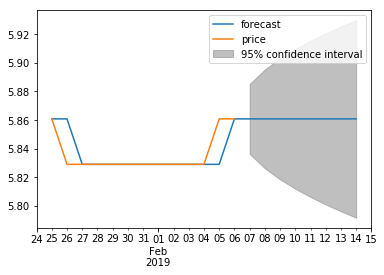

In [38]:
forecast = results_AR.forecast(steps=7)
#print(results_AR.forecast(steps=7))

results_AR.plot_predict(1,21)
results_AR.forecast(steps=7)